In [119]:
from sklearn import datasets
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(7,7)


In [4]:
iris = datasets.load_iris()

In [43]:
# We will only use petal length and petal width for this example
X = iris.data[:,[2,3]]
y = iris.target

In [44]:
iris_df = pd.DataFrame({'petalLength': X[:,0], 'petalWidth': X[:,1], 'target':y})

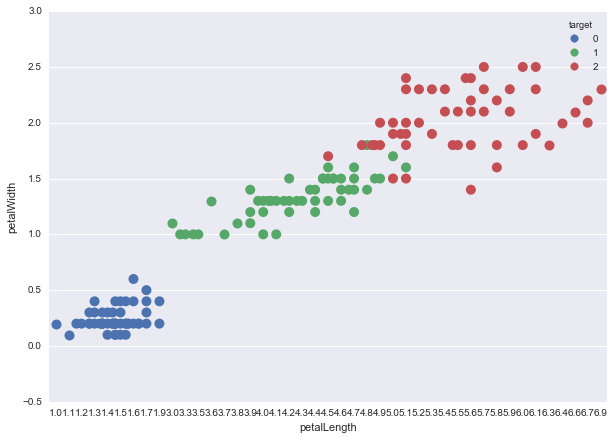

In [45]:

sns.swarmplot(x='petalLength', y = 'petalWidth', data = iris_df,hue = 'target',size=10)

In [46]:
# To evaluate how well a trained model performs on unseen data, we will further split the dataset
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
# Now we will perform feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [54]:
#using fit method, StandardScaler estimates the parameters sample mean and standard deviation for each feature dimension...
#--from the dataset
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Train a Perceptron Model

In [121]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0 = 0.1, random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [122]:
y_pred = ppn.predict(X_test_std)
print 'Misclassified samples: %d' %(y_test != y_pred).sum()

Misclassified samples: 4


In [123]:
# to calculate accuracy, perfomance metric is used
from sklearn.metrics import accuracy_score
print 'Accuracy: %.2f' % accuracy_score(y_test,y_pred)

Accuracy: 0.91


In [130]:
#Plotting Decision Boundary
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx =None, resolution=0.01):
    #setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface 
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot all samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker = markers[idx], label=cl)
    
    #highlight test samples
    if test_idx:
        x_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidths=1,marker='o',s=55,label = 'test set')

In [124]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

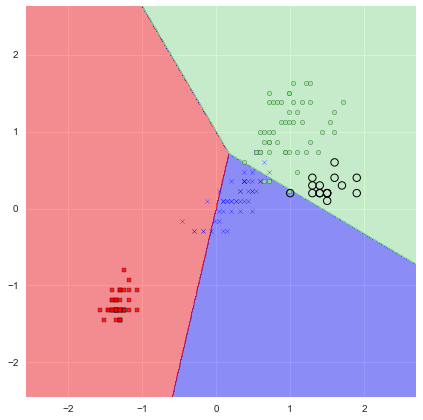

In [133]:
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(50,100))
plt.show()